In [4]:

import sys
sys.path.append("..")

from helpers.load_data import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [5]:
load_datafolder('raw')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 310: invalid start byte

In [5]:
calls['CallerTypeAffected3rdParty'].isna().value_counts()
calls['CallerDemographicsAgeGroup'].value_counts()

CallerDemographicsAgeGroup
19-54 Adult               192009
65+ Senior                 22575
Unknown                     9327
55-64 Adult                 8985
55-64 Older Adult           1762
13-18 Youth                  839
0-12 Child                    35
Prefer not to Disclose        16
Name: count, dtype: int64

In [7]:
reasons=dfs['reasons.csv']

In [4]:
merged_df=calls.merge(reasons,how='inner',left_on='callreportnum',right_on='callreportnum1')
merged_df.head()

NameError: name 'calls' is not defined

In [5]:
final=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data.csv')
final.head()

/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/130791295.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  final=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data.csv')


,callreportnum,DateStart,TimeStart,DateEnd,TimeEnd,CallLength,CityName,CallType,ContactMethod,CallerDemographicsGender,CallerDemographicsAgeGroup,CallerDemographicsCallerType,CallerTypeAffected3rdParty,CallerDemographicsInterpretationLanguage,CallerDemographicsInterpretationOtherlanguage,PublicityOtherPublicity,Mainreason,ReasonDetail
0,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Abuse,Domestic Violence
1,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter
2,54694245.0,2018-07-16,1899-12-31 16:39:00,2018-07-16,1899-12-31 17:07:00,28,unknown,Assessment and Referral,Text Message,Unknown,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,BC Hydro CCF,NaN
3,54693989.0,2018-07-16,1899-12-31 16:27:00,2018-07-16,1899-12-31 16:37:00,10,Winnipeg,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,Housing and Homelessness,Immediate Shelter
4,54693908.0,2018-07-16,1899-12-31 16:23:00,2018-07-16,1899-12-31 16:26:00,3,Burnaby,Assessment and Referral,Telephone,Female,19-54 Adult,Service Provider,NaN,NaN,NaN,Not Obtained,Income & Financial Assistance,NaN


In [6]:
def missing_values_table(dataframe):
    variables_with_na = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]
    n_miss = dataframe[variables_with_na].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[variables_with_na].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df)
    return variables_with_na


missing_values_table(final)

                                               n_miss  ratio
CallerDemographicsInterpretationOtherlanguage  314671  99.94
CallerDemographicsInterpretationLanguage       312349  99.20
CallerTypeAffected3rdParty                     286627  91.03
ReasonDetail                                    73979  23.50
CityName                                          560   0.18
PublicityOtherPublicity                           239   0.08
CallerDemographicsGender                           18   0.01
CallerDemographicsCallerType                        3   0.00
CallerDemographicsAgeGroup                          1   0.00


['CityName',
 'CallerDemographicsGender',
 'CallerDemographicsAgeGroup',
 'CallerDemographicsCallerType',
 'CallerTypeAffected3rdParty',
 'CallerDemographicsInterpretationLanguage',
 'CallerDemographicsInterpretationOtherlanguage',
 'PublicityOtherPublicity',
 'ReasonDetail']

In [7]:
calls[['DateStart','TimeStart','DateEnd','TimeEnd']]

NameError: name 'calls' is not defined

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureW

<Axes: xlabel='DateEnd', ylabel='CallLength'>

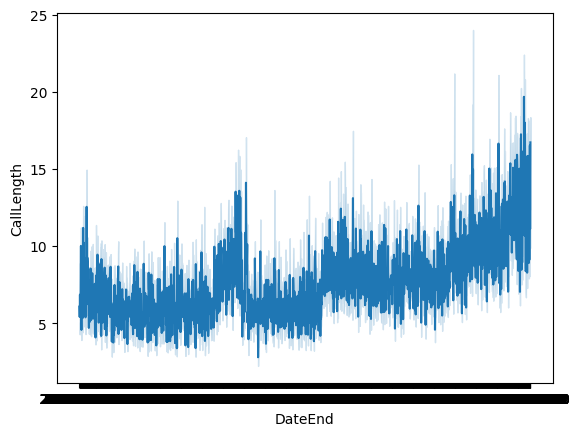

In [8]:
final[['DateEnd','CallLength']]
sns.lineplot(data=final,x='DateEnd',y='CallLength')

In [9]:
final.columns

Index(['callreportnum', 'DateStart', 'TimeStart', 'DateEnd', 'TimeEnd',
       'CallLength', 'CityName', 'CallType', 'ContactMethod',
       'CallerDemographicsGender', 'CallerDemographicsAgeGroup',
       'CallerDemographicsCallerType', 'CallerTypeAffected3rdParty',
       'CallerDemographicsInterpretationLanguage',
       'CallerDemographicsInterpretationOtherlanguage',
       'PublicityOtherPublicity', 'Mainreason', 'ReasonDetail'],
      dtype='object')

In [10]:
final.head()

,callreportnum,DateStart,TimeStart,DateEnd,TimeEnd,CallLength,CityName,CallType,ContactMethod,CallerDemographicsGender,CallerDemographicsAgeGroup,CallerDemographicsCallerType,CallerTypeAffected3rdParty,CallerDemographicsInterpretationLanguage,CallerDemographicsInterpretationOtherlanguage,PublicityOtherPublicity,Mainreason,ReasonDetail
0,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Abuse,Domestic Violence
1,54694316.0,2018-07-16,1899-12-31 16:42:00,2018-07-16,1899-12-31 16:51:00,9,New Westminster,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Not Obtained,Housing and Homelessness,Immediate Shelter
2,54694245.0,2018-07-16,1899-12-31 16:39:00,2018-07-16,1899-12-31 17:07:00,28,unknown,Assessment and Referral,Text Message,Unknown,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,BC Hydro CCF,NaN
3,54693989.0,2018-07-16,1899-12-31 16:27:00,2018-07-16,1899-12-31 16:37:00,10,Winnipeg,Assessment and Referral,Telephone,Female,19-54 Adult,Individual,NaN,NaN,NaN,Service Provider,Housing and Homelessness,Immediate Shelter
4,54693908.0,2018-07-16,1899-12-31 16:23:00,2018-07-16,1899-12-31 16:26:00,3,Burnaby,Assessment and Referral,Telephone,Female,19-54 Adult,Service Provider,NaN,NaN,NaN,Not Obtained,Income & Financial Assistance,NaN


/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='CallType', ylabel='count'>

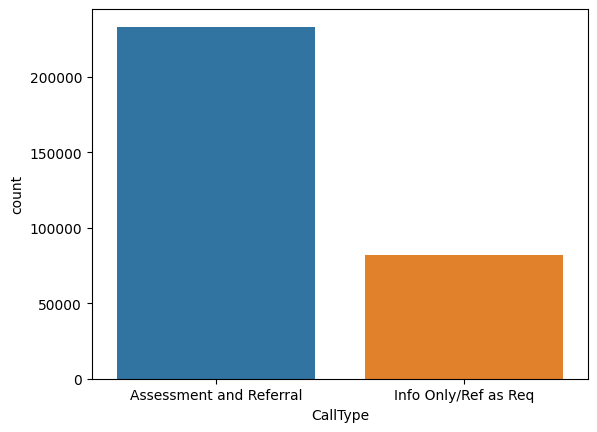

In [11]:
sns.countplot(data=final,x='CallType')

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='CallerDemographicsAgeGroup', ylabel='count'>

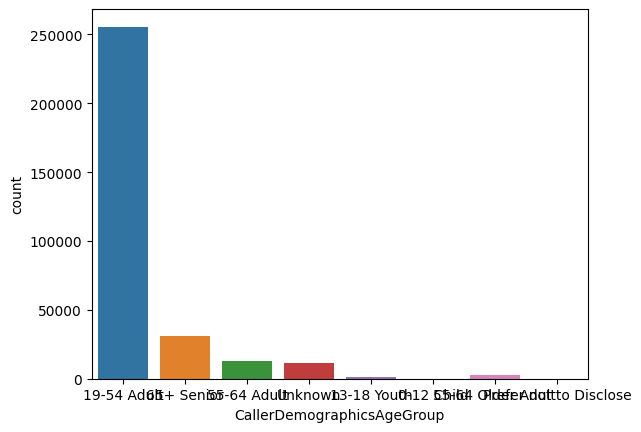

In [12]:
sns.countplot(data=final,x='CallerDemographicsAgeGroup')

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


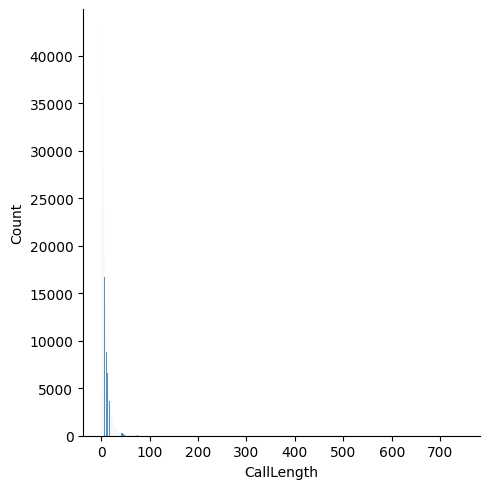

In [13]:
sns.displot(data=final,x='CallLength')

In [14]:
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('2 Spirited','2 Spirit')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Trans Female','Trans')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Trans Male','Trans')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Transgender','Trans')
final['CallerDemographicsGender']=final['CallerDemographicsGender'].str.replace('Prefer not to Disclose','Unknown')

In [15]:
final['CallerDemographicsGender'].value_counts()

CallerDemographicsGender
Female          188273
Male            115742
Unknown          10172
Trans              540
Non-binary          69
2 Spirit            25
Gender Fluid        15
Name: count, dtype: int64

In [16]:
mod_df=final[(final['CallerDemographicsGender'] == 'Female') | (final['CallerDemographicsGender'] == 'Male')] 

In [17]:
final['CallerDemographicsAgeGroup'].value_counts()

CallerDemographicsAgeGroup
19-54 Adult               255598
65+ Senior                 31280
55-64 Adult                12663
Unknown                    11211
55-64 Older Adult           2903
13-18 Youth                 1143
0-12 Child                    34
Prefer not to Disclose        21
Name: count, dtype: int64

In [18]:
mod_df=final[(final['CallerDemographicsAgeGroup']=='65+ Senior')|(final['CallerDemographicsAgeGroup']=='19-54 Adult') | (final['CallerDemographicsAgeGroup']=='55-64 Adult')
            | (final['CallerDemographicsAgeGroup']=='13-18 Youth') ]
mod_df['CallerDemographicsAgeGroup'].value_counts()

CallerDemographicsAgeGroup
19-54 Adult    255598
65+ Senior      31280
55-64 Adult     12663
13-18 Youth      1143
Name: count, dtype: int64

In [19]:
mod_df['DateStart']=pd.to_datetime(mod_df['DateStart'])
mod_df['Year']=mod_df['DateStart'].dt.year

/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/2854001211.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['DateStart']=pd.to_datetime(mod_df['DateStart'])
/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/2854001211.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_df['Year']=mod_df['DateStart'].dt.year


/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='Year', ylabel='count'>

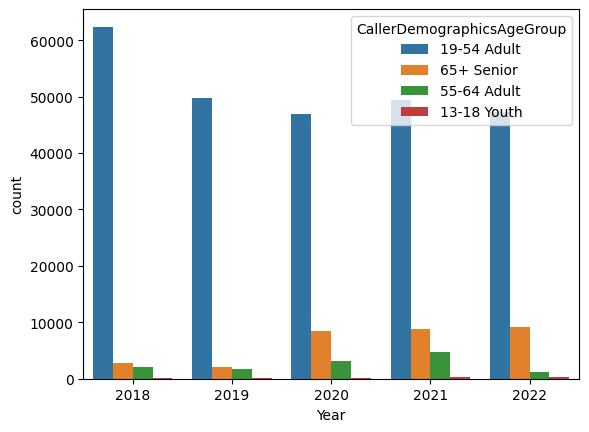

In [20]:
sns.countplot(data=mod_df,x='Year',hue='CallerDemographicsAgeGroup')

In [21]:
mod_df['PublicityOtherPublicity'].value_counts()
mod_df=mod_df[mod_df['PublicityOtherPublicity'] != 'Not Obtained']

In [50]:
mod_df=mod_df[['CallType','Year','CityName','ContactMethod','CallerDemographicsAgeGroup','CallLength','CallerDemographicsGender']]
mod_df=mod_df.dropna()
mod_df.head()

,CallType,Year,CityName,ContactMethod,CallerDemographicsAgeGroup,CallLength,CallerDemographicsGender
5,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,2,Male
6,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,1,Male
7,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,2,Female
8,Assessment and Referral,2018,Vancouver,Telephone,19-54 Adult,2,Female
10,Assessment and Referral,2018,Surrey,Telephone,19-54 Adult,8,Female


In [51]:
mod_df=mod_df[(mod_df['CityName'] == 'Vancouver') | (mod_df['CityName'] == 'Surrey') | (mod_df['CityName'] == 'Burnaby')] 

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='Year', ylabel='count'>

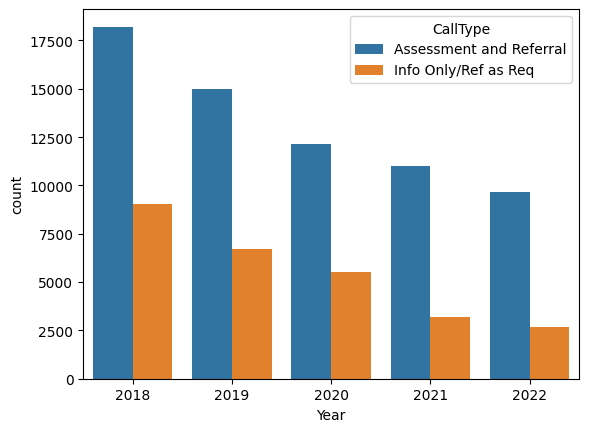

In [61]:
sns.countplot(data=mod_df,x='Year',hue='CallType')

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='Year', ylabel='count'>

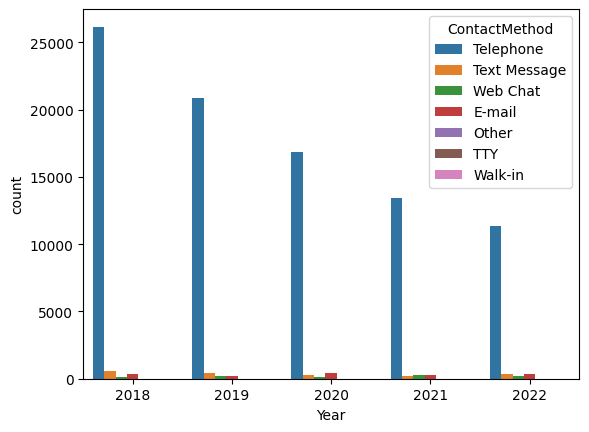

In [62]:
sns.countplot(data=mod_df,x='Year',hue='ContactMethod')

In [53]:
#gender,year,age group,city,call type, contact method
features=['CallType','CityName','Year','ContactMethod','CallerDemographicsAgeGroup','CallerDemographicsGender']
Y=mod_df['CallLength']
X=mod_df[features]

In [54]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', preprocessing.OneHotEncoder(), features)
    ],
    remainder='passthrough'  # Keep numeric features that are not transformed
)

In [55]:
lr_clf = make_pipeline(
    encoder,
    StandardScaler(with_mean=False),
    LinearRegression()
)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2,random_state=0)

In [64]:
mod=lr_clf.fit(X_train,y_train)

In [65]:
mod.score(X_test,y_test)

0.0844009680958906

In [66]:
preds=mod.predict(X_test)
preds

array([8.07135795, 5.46026772, 5.22014348, ..., 9.47805726, 5.46026772,
       6.65189861])

In [67]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE: 7.3969964199664355


Model 2 Timer Series Analysis

In [83]:
from statsmodels.tsa.arima.model import ARIMA

In [79]:
mod2_df=final
mod2_df.columns

Index(['callreportnum', 'DateStart', 'TimeStart', 'DateEnd', 'TimeEnd',
       'CallLength', 'CityName', 'CallType', 'ContactMethod',
       'CallerDemographicsGender', 'CallerDemographicsAgeGroup',
       'CallerDemographicsCallerType', 'CallerTypeAffected3rdParty',
       'CallerDemographicsInterpretationLanguage',
       'CallerDemographicsInterpretationOtherlanguage',
       'PublicityOtherPublicity', 'Mainreason', 'ReasonDetail'],
      dtype='object')

In [91]:
ts_df=mod2_df[['DateStart','CallLength']]
ts_df['DateStart'] = pd.to_datetime(ts_df['DateStart'])

/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/150463409.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ts_df['DateStart'] = pd.to_datetime(ts_df['DateStart'])


DateStart
2018-07-16     9
2018-07-16     9
2018-07-16    28
2018-07-16    10
2018-07-16     3
              ..
2022-12-07     8
2022-12-07     8
2022-12-07     7
2022-12-07     2
2022-12-07     5
Length: 314854, dtype: int64

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureW

<Axes: xlabel='DateStart'>

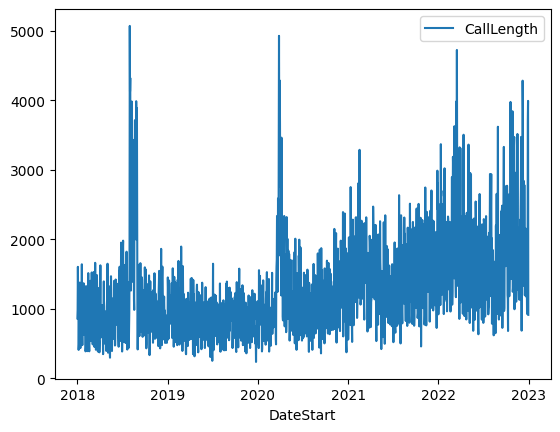

In [101]:
dt_df=ts_df.groupby('DateStart').sum()
sns.lineplot(data=dt_df)

In [110]:
dt_df.sort_values('CallLength',ascending=False)

,CallLength
DateStart,
2018-08-01,5073
2020-03-27,4930
2022-03-17,4727
2018-08-03,4323
2020-03-30,4287
...,...
2019-04-20,319
2019-06-23,309
2018-05-13,299


In [107]:
ts = pd.Series(dt_df['CallLength'].values,index=dt_df.index)

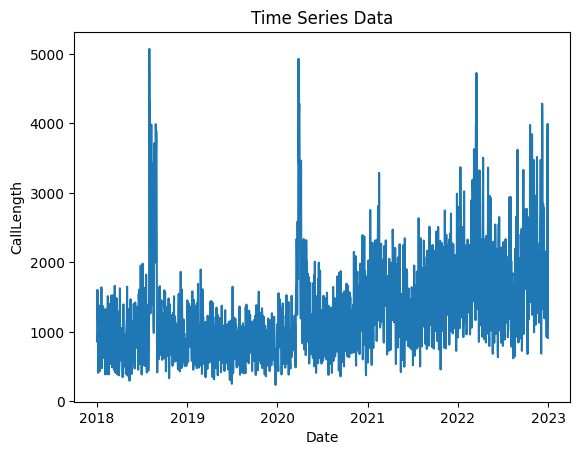

In [123]:
plt.plot(ts)
plt.xlabel('Date')
plt.ylabel('CallLength')
plt.title('Time Series Data')
plt.show()

In [111]:
# Fit an ARIMA model
order = (1, 1, 1)  # Replace with appropriate order (p, d, q)
model = ARIMA(ts, order=order)
results = model.fit()

/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [112]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14006.901
Date:                Sat, 23 Sep 2023   AIC                          28019.802
Time:                        16:36:58   BIC                          28036.330
Sample:                    01-01-2018   HQIC                         28025.899
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2958      0.017     17.721      0.000       0.263       0.329
ma.L1         -0.9209      0.007   -135.231      0.000      -0.934      -0.908
sigma2      2.714e+05   5664.289     47.918      0.0

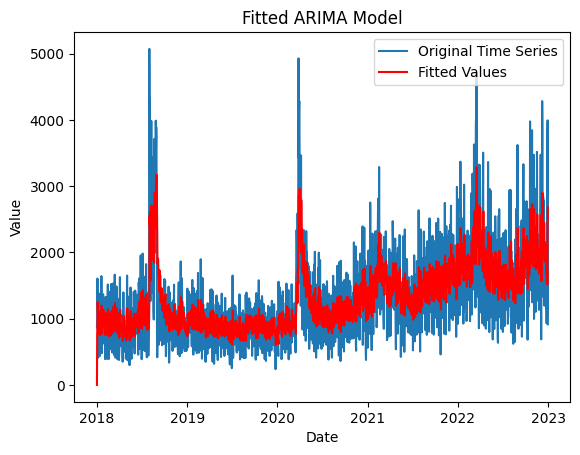

In [113]:
plt.plot(ts, label='Original Time Series')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Fitted ARIMA Model')
plt.show()

In [119]:
# Forecast future values
forecast_steps = 10  # Number of steps to forecast ahead
forecast = results.get_forecast(steps=forecast_steps)
forecast.predicted_mean

2023-01-01    1632.639953
2023-01-02    1844.913288
2023-01-03    1907.702390
2023-01-04    1926.275007
2023-01-05    1931.768669
2023-01-06    1933.393659
2023-01-07    1933.874321
2023-01-08    1934.016498
2023-01-09    1934.058553
2023-01-10    1934.070992
Freq: D, Name: predicted_mean, dtype: float64

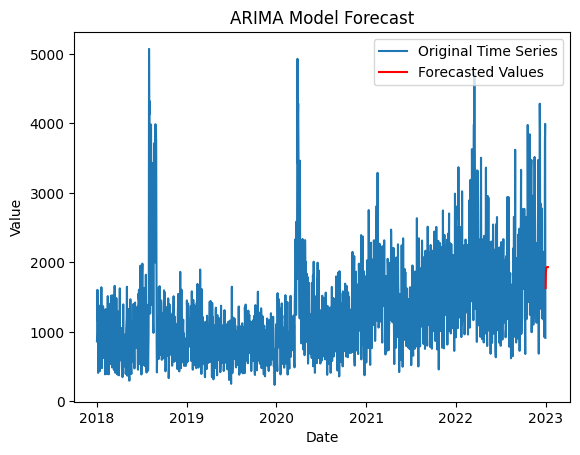

In [118]:
plt.plot(ts, label='Original Time Series')
plt.plot(forecast.predicted_mean, color='red', label='Forecasted Values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

Time Series Analysis in Different Cities

In [157]:
##bby=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data_burnaby.csv')
van=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data_vancouver.csv')
#sur=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data_surrey.csv')
#nw=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data_nw.csv')
#vic=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data_victoria.csv')

/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/1929095905.py:2: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  van=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data_vancouver.csv')
/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/1929095905.py:3: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  sur=pd.read_csv('/Users/xirao/Documents/Hackthon/vanml-hacks-2023/data/raw/final_data_surrey.csv')


In [163]:
def ts_pre(df):
    df=df[['DateStart','CallLength']]
    df['DateStart'] = pd.to_datetime(df['DateStart'])
    df=df.groupby('DateStart').sum('CallLength')
    return df

In [204]:
ts_van=ts_pre(van)
#ts_bby = pd.Series(ts_bby['CallLength'].values,index=ts_bby.index)
# Fit an ARIMA model
order = (1, 1, 1)  # Replace with appropriate order (p, d, q)
model = ARIMA(ts_van, order=order)
results = model.fit()

forecast_index = pd.date_range(start="1/1/2023", periods=forecast_steps, freq='D')

# Forecast future values
forecast_steps = 10  # Number of steps to forecast ahead
forecast = results.get_forecast(steps=forecast_steps)
#forecast_series = pd.Series(, index=forecast_index)
forecast.predicted_mean

/var/folders/qt/t8g050hd0_v1kv6v67nrpgf40000gn/T/ipykernel_53060/1455787421.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DateStart'] = pd.to_datetime(df['DateStart'])
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/xirao/Documents/Hackthon/vanml-hacks-2023/venv/lib/python3.9/site-packages/statsmod

2023-01-01    450.461516
2023-01-02    491.296867
2023-01-03    499.961071
2023-01-04    501.799391
2023-01-05    502.189434
2023-01-06    502.272192
2023-01-07    502.289751
2023-01-08    502.293476
2023-01-09    502.294267
2023-01-10    502.294434
Freq: D, Name: predicted_mean, dtype: float64

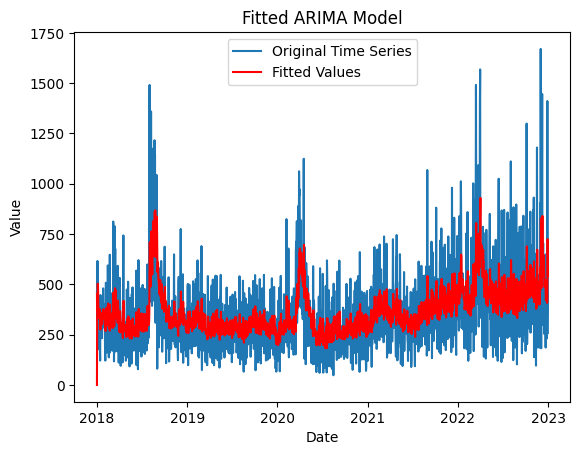

In [207]:
plt.plot(ts_van, label='Original Time Series')
plt.plot(results.fittedvalues, color='red', label='Fitted Values')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Fitted ARIMA Model')
plt.show()

In [208]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             CallLength   No. Observations:                 1826
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12009.650
Date:                Sun, 24 Sep 2023   AIC                          24025.299
Time:                        10:18:08   BIC                          24041.827
Sample:                    01-01-2018   HQIC                         24031.396
                         - 12-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2122      0.019     11.030      0.000       0.174       0.250
ma.L1         -0.9290      0.007   -124.589      0.000      -0.944      -0.914
sigma2      3.041e+04    605.755     50.203      0.0

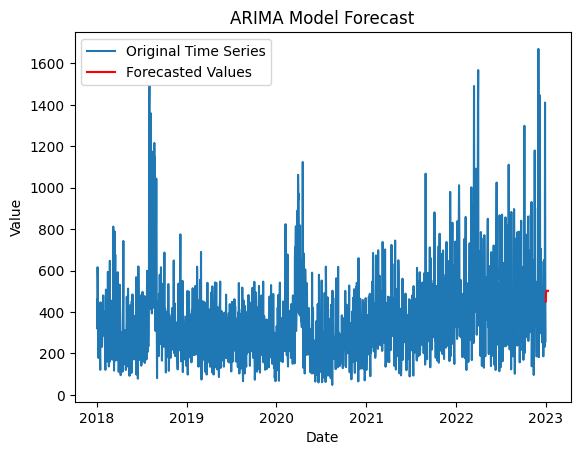

In [206]:
  plt.plot(ts_van, label='Original Time Series')
  plt.plot(forecast_index, forecast.predicted_mean.values, color='red', label='Forecasted Values')
 # plt.plot(forecast.predicted_mean, color='red', label='Forecasted Values')
  plt.xlabel('Date')
  plt.ylabel('Value')
  plt.title('ARIMA Model Forecast')
  plt.legend()
  plt.show()

In [72]:
features=['CallType','Year','ContactMethod','CallerDemographicsAgeGroup','CallerDemographicsGender']
Y=mod2_df['CallLength']
X=mod2_df[features]

In [73]:
encoder = ColumnTransformer(
    transformers=[
        ('cat', preprocessing.OneHotEncoder(), features)
    ],
    remainder='passthrough'  # Keep numeric features that are not transformed
)

lr_clf = make_pipeline(
    encoder,
    StandardScaler(with_mean=False),
    LinearRegression()
)
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                    test_size=0.2,random_state=0)

In [74]:
mod=lr_clf.fit(X_train,y_train)
mod.score(X_test,y_test)

0.07727192406007743

In [75]:
preds=mod.predict(X_test)
preds

array([2.83501881, 6.04274486, 6.16439916, ..., 6.16439916, 5.58175956,
       9.61902926])

In [76]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

RMSE: 6.939042793296337


In [211]:
final['Mainreason'].value_counts()

Mainreason
Housing and Homelessness                         119141
Health                                            29073
Income & Financial Assistance                     23531
Substance Use                                     22473
Legal and Public Safety                           16599
Mental Health                                     16424
Basic Needs                                       16184
Abuse                                             15446
Government Services                               12099
Transportation                                     7533
BC Hydro CCF                                       4415
Complaints                                         3751
Volunteer/Donations                                3212
Citizenship Immigration & Settlement               3051
Consumer & Commercial                              3004
Other Crimes                                       2619
Conflict with Others                               2284
Employment                           